In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
...                 [ 2.,  0.,  0.],
...                 [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler


StandardScaler()

In [4]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [6]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [7]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
import pandas as pd

#Read the dataset from the csv file
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

#Split the data into numerical and cathegorical values
X_num = df.select_dtypes(include=['int64', 'float64'])
X_cat = df.select_dtypes(include = ["object"])
print(X_num.columns)

#Scale the numerical data
scaler = preprocessing.StandardScaler().fit(X_num)
X_num_scaled = scaler.transform(X_num)

#Encode the cathegorical values
enc = preprocessing.OrdinalEncoder().fit(X_cat)
X_cat_encoded = enc.transform(X_cat)

#Put the modeled data back togheter
X_modeled = np.concatenate((X_num_scaled, X_cat_encoded), axis = 1)

#print(X_modeled)
#print(X_num_scaled)
print(X_cat_encoded)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
[[5.375e+03 0.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 0.000e+00]
 [3.962e+03 1.000e+00 0.000e+00 ... 0.000e+00 3.000e+00 0.000e+00]
 [2.564e+03 1.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 1.000e+00]
 ...
 [3.367e+03 0.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 0.000e+00]
 [5.934e+03 1.000e+00 1.000e+00 ... 1.000e+00 3.000e+00 1.000e+00]
 [2.226e+03 1.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]]


In [21]:
df = pd.read_csv("score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
X = np.array(df['Hours'])
y = np.array(df['Scores'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

NameError: name 'train_test_split' is not defined

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
  X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)

In [30]:
lr.predict([20])


ValueError: Expected 2D array, got 1D array instead:
array=[20].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

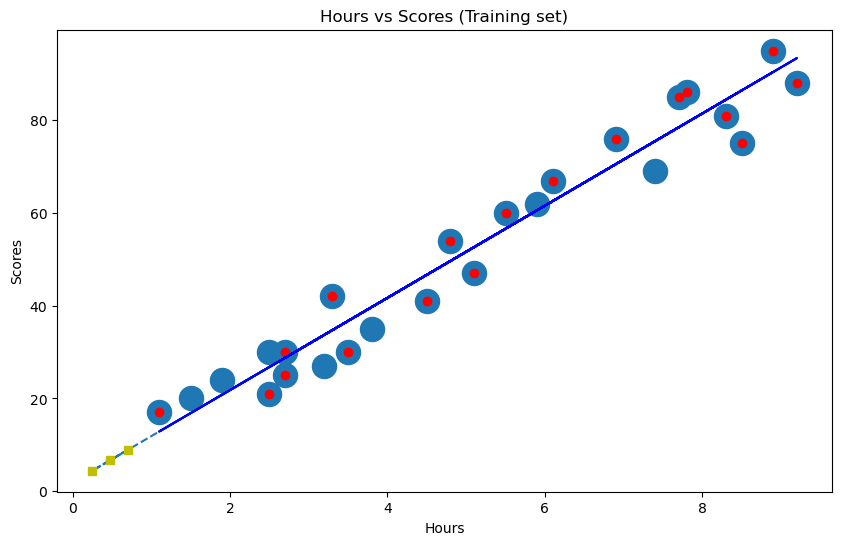

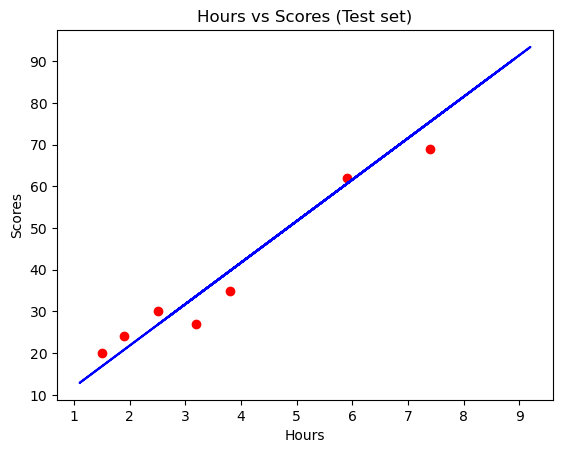

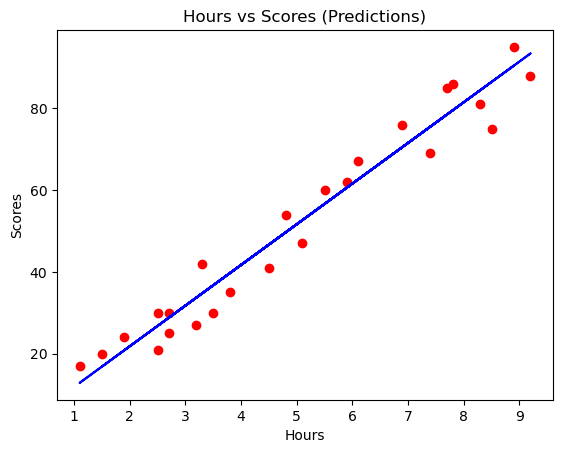

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn 
import matplotlib.pyplot as plt

df = pd.read_csv("score.csv")
df.head()

X = np.array(df['Hours'])
y = np.array(df['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)
pred1 = lr.predict([[0.25]])
pred2 = lr.predict([[0.71]])
pred3 = lr.predict([[0.48]])

a = lr.coef_[0]
b = lr.intercept_

fig_scat, ax_scat = plt.subplots(1,1,figsize=(10,6))
x = X.T
best_fit = b + a * (np.append(x, [0.25,0.71,0.48]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[0.25,0.71,0.48]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([0.25],pred1, "ys", label="LinearRegression")
ax_scat.plot([0.71],pred2, "ys", label="LinearRegression")
ax_scat.plot([0.48],pred3, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$')

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

X = X.reshape(-1, 1)

plt.scatter(X, y, color='red')
plt.plot(X, lr.predict(X), color='blue')
plt.title('Hours vs Scores (Predictions)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


df = pd.read_csv("score.csv")
df.head()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")
print()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")
print()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94

Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94

Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94


In [70]:
import pandas as pd

#Read the dataset from the csv file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

#Split the data into numerical and cathegorical values
X_num = df.select_dtypes(include=['int64', 'float64'])
X_cat = df.select_dtypes(include = ["object"])
print(X_num.columns)

#Scale the numerical data
scaler = preprocessing.StandardScaler().fit(X_num)
X_num_scaled = scaler.transform(X_num)

#Encode the cathegorical values
enc = preprocessing.OrdinalEncoder().fit(X_cat)
X_cat_encoded = enc.transform(X_cat)

#Put the modeled data back togheter
X_modeled = np.concatenate((X_num_scaled, X_cat_encoded), axis = 1)

#print(X_modeled)
#print(X_num_scaled)
print(X_cat_encoded)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
[[5.375e+03 0.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 0.000e+00]
 [3.962e+03 1.000e+00 0.000e+00 ... 0.000e+00 3.000e+00 0.000e+00]
 [2.564e+03 1.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 1.000e+00]
 ...
 [3.367e+03 0.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 0.000e+00]
 [5.934e+03 1.000e+00 1.000e+00 ... 1.000e+00 3.000e+00 1.000e+00]
 [2.226e+03 1.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]]
